<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue">Step 3:</span> Feature Engineering</h1>
<hr>

After cleaning the dataset, the next step is to engineer features that can help our predictive models. 

> *<span style="color:tomato;font-weight:bold">Feature engineering</span> is the practice of creating new features from existing ones.*
* The engineered features are often more specific or isolate key information.
* Often, feature engineering is one of the most valuable tasks we as a data scientist can do to improve our model'z effectiveness.

There are  limitless possibilities for this step... it's more like an artistic skill that will naturally improve as you gain more experience and domain expertise. However, you can use this checklist as a reliable starting point!



### Essentials...
Load our cleaned dataset and then cover these steps: 

1. [Start with domain knowledge](#domain)
2. [Create interaction features](#interaction)
3. [Group sparse classes](#group)
4. [Encode dummy variables](#dummy)
5. [Remove unused or redundant features](#remove)

Finally, save the augmented dataframe (analytical base table) to a new file so we can use it for modeling.

### Import libraries and load the cleaned dataset.

In [85]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.options.mode.chained_assignment = None  # default='warn'

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

Import the **cleaned** dataset that we created

In [86]:
# Load cleaned dataset from Module 2
df = pd.read_csv('cleaned_df.csv')

Now, let's display the first 5 rows from the dataset, just so we can have a view of the existing features in front of us.

In [87]:
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,Missing,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


<br id="domain">
# 1. Start with domain knowledge

You can often engineer informative features by tapping into your (or others') expertise about the domain.

<br>
For example: say you know that homes with 2 bedrooms and 2 bathrooms are especially popular for investors.
- Maybe you suspect these types of properties command premium prices. (You don't need to know for sure.)

Sure, number of bedrooms and number of bathrooms both already exist as features in the dataset.
However, they do not specifically isolate this type of property.

In [88]:
# find where the data shows  properties with 2 beds and 2 baths
# convert the resulting series to type int to map from True/False to 1/0
two_bed_bath = ((df.beds == 2) &(df.baths == 2)).astype(int)

# Create indicator variable for properties with 2 beds and 2 baths
df['two_and_two'] = two_bed_bath
df['two_and_two'].head()

0    0
1    0
2    0
3    0
4    0
Name: two_and_two, dtype: int64

Because it's an indicator variable, 'two_and_two' only contains values of 0 or 1.
Therefore, we can take the mean to find the proportion of observations that have 2 beds and 2 baths.
In [6]:

Display the proportion of our observations that have 2 beds and 2 baths.

In [89]:
# Display percent of rows where two_and_two == 1
df.two_and_two.mean()

0.09458023379383634

The interpretation is that almost 9.5% of the observations in our dataset are for properties with 2 beds and 2 baths.

Let's consider the housing market recession circa 2010 - 2013

In [90]:
# Create indicator feature for transactions between 2010 and 2013, inclusive
during_recession = ((df.tx_year >= 2010) & (df.tx_year <=2013)).astype(int)
df['during_recession'] = during_recession

**What proportion of transactions in our dataset were during the recession?**

In [91]:
# percent of transactions where during_recession == 1
df['during_recession'].mean()

0.2635494155154091

Note when where we're checking to see if a value falls between two numbers, there's a shortcut:

<pre style="color:steelblue">df.tx_year<strong>.between(2010, 2013)</strong>.astype(int)</pre>

This creates an indicator feature that should be equivalent to the one you created earlier from combining two boolean masks.

<br>
**Confirm that the "between" indicator feature is equivalent to the one you created earlier.**
* Set the earlier feature to a variable named <code style="color:steelblue">a</code>
* Set this new feature to a variable named <code style="color:steelblue">b</code>
* Confirm they are equivalent with <code style="color:steelblue">all(a == b)</code>, which checks to see if every element in <code style="color:steelblue">a</code> is equal to the corresponding element in <code style="color:steelblue">b</code>

In [92]:
# Set variable a as the earlier indicator variable (combining two masks)
a = during_recession

# Set variable b as the new indicator variable (using "between")
b = df.tx_year.between(2010, 2013).astype(int)

# Proof: a and b equivalent?
all(a==b)

True

**Let's overwrite the <code style="color:steelblue">'during_recession'</code> feature just for fun **

In [93]:
# Create indicator feature for transactions between 2010 and 2013, inclusive
df['during_recession'] = df.tx_year.between(2010,2013).astype(int)

# 2. Create interaction features

Look for specific **heuristics** that can help spark more ideas.

checking to see if you can create any interaction features that make sense.



- **Interaction features are operations between two or more other features.**
- Interaction features can be products, sums, or differences between two features.

Create <code style="color:steelblue">'property_age'</code> feature for the age of the property at the time of the transaction.

In [94]:
# Create a property age feature
df['property_age'] = df.tx_year - df.year_built

Do a quick sanity check. Print the minimum <code style="color:steelblue">'property_age'</code>.

In [95]:
# Should not be less than 0
df.property_age.min()

-8

Print the number of observations with <code style="color:steelblue">'property_age'</code> less than 0.

In [96]:
# Number of observations with 'property_age' < 0
sum(df.property_age < 0)

19

It looks like we don't have many with negative property age.

On second thought, it's possible that some homeowners bought houses before the construction company built them.
This is not uncommon, especially with single-family homes.

Still for practice remove observations where <code style="color:steelblue">'property_age'</code> is less than 0.**
* use a boolean mask to keep only observations where <code style="color:steelblue">'property_age'</code> is at least 0 and Overwrite the existing <code style="color:steelblue">df</code>.

In [97]:
# Remove rows where property_age is less than 0
df = df[df.property_age >=0]
# Print number of rows in remaining dataframe
df

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,two_and_two,during_recession,property_age
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013,0,1,0
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006,0,0,41
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012,0,1,49
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005,0,0,5
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,Missing,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002,0,0,10
5,265000,1,1,641,1947,0,Apartment / Condo / Townhouse,Brick,Missing,0.0,146,10,23,27,86,9,60,52,28.0,15.0,86.0,168.0,58.0,8.0,3.0,2004,0,0,57
6,240000,1,1,642,1944,0,Single-Family,Brick,Missing,0.0,159,13,36,17,92,12,66,50,28.0,36.0,88.0,176.0,61.0,7.0,3.0,2011,0,1,67
7,388100,1,1,650,2000,33541,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,266.0,92.0,9.0,3.0,2005,0,0,5
8,240000,1,1,660,1983,0,Apartment / Condo / Townhouse,Brick,Missing,0.0,51,8,6,2,40,18,32,41,36.0,49.0,77.0,188.0,65.0,6.0,3.0,2013,0,1,30
9,250000,1,1,664,1965,0,Apartment / Condo / Townhouse,Brick,Missing,0.0,119,10,26,25,183,13,70,36,57.0,13.0,83.0,147.0,51.0,6.0,3.0,2007,0,0,42


Let's consier another interaction feature such as the **quality** of schools nearby

* we know the number of schools nearby (<code style="color:steelblue">'num_schools'</code>) 
* We also have their median quality score (<code style="color:steelblue">'median_schools'</code>)
* But what if it's the **interaction** of those two factors that's really important? 
* In other words, what if it's good to have many school options, but only if they are good?
<br>

**Create a new feature called <code style="color:steelblue">'school_score'</code> that is the product of <code style="color:steelblue">'num_schools'</code> and <code style="color:steelblue">'median_schools'</code>.**

In [98]:
# Create a school score feature that num_schools * median_school
df['school_score'] = df.num_schools * df.median_school

**Finally, display the median <code style="color:steelblue">'school_score'</code> from the dataset.**

In [99]:
# Display median school score
df.school_score.median()

18.0

# 3. Group sparse classes

Sparse classes are those that have very few total observations.
We want to reduce the number of sparse classes in our categorical features.

Sparse classes can be problematic for certain machine learning algorithms:
- At best, they are ignored.
- At worst, they can cause models to be overfit.

The next heuristic we'll consider is grouping sparse classes in our categorical features. 

** How to check for sparse classes: **

The easiest way to check for sparse classes is simply by plotting the distributions of your categorical features. We already did this during exploratory analysis, but since we've done some data cleaning since then, let's plot them again.

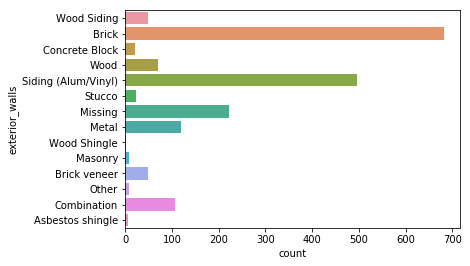

In [100]:
# Bar plot for exterior_walls
sns.countplot(y='exterior_walls', data=df)
%clear

Seems like we can group <code style="color:crimson">'Wood Siding'</code>, <code style="color:crimson">'Wood Shingle'</code>, and <code style="color:crimson">'Wood'</code> together. And label all of them as simply <code style="color:crimson">'Wood'</code>.

In [101]:
# Group 'Wood Siding' and 'Wood Shingle' with 'Wood'
df.exterior_walls.replace(['Wood Siding', 'Wood Shingle'], 'Wood', inplace=True)

Other classes:
we can group the remaining, no-like sparse classes into a single 'Other' class, even though there's already an  'Other' class.

let's label <code style="color:crimson">'Stucco'</code>, <code style="color:crimson">'Other'</code>, <code style="color:crimson">'Asbestos shingle'</code>, <code style="color:crimson">'Concrete Block'</code>, and <code style="color:crimson">'Masonry'</code> as <code style="color:crimson;">'Other'</code>:

In [102]:
# List of classes to group
other_exterior_walls = ['Concrete Block', 'Stucco', 'Masonry', 'Other', 'Asbestos shingle']

# Group other classes into 'Other'
df.exterior_walls.replace(other_exterior_walls, 'Other', inplace=True)

Finally, now that we've grouped together sparse classes, let's look at the bar plot for exterior walls again.

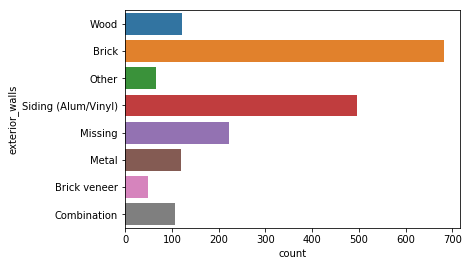

In [103]:
# Bar plot for exterior_walls
sns.countplot(y='exterior_walls', data= df)

Much better.

**Display the bar plot for <code style="color:steelblue">'roof'</code>.**

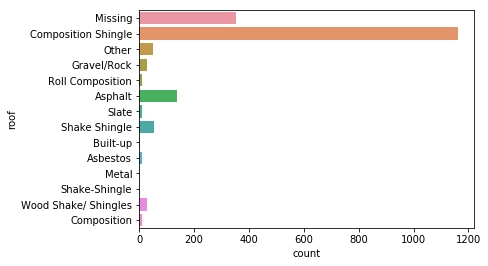

In [104]:
# Bar plot for roof
sns.countplot(y='roof', data=df)

As we did with <code style="color:steelblue">'exterior_walls'</code> above, we can start by grouping classes that are quite similar. 

**Group <code style="color:crimson">'Composition'</code> and <code style="color:crimson">'Wood Shake/ Shingles'</code> into the <code style="color:crimson">'Composition Shingle'</code> class.**

In [105]:
# Group 'Composition' and 'Wood Shake/ Shingles' into 'Composition Shingle'
df.roof.replace(['Composition','Wood Shake Shingles'], 'Composition Shingle', inplace=True)
'Shake-Shingle'
df.roof.replace('Shake-Shingle', 'Shake Shingle', inplace=True)


Next, let's group remaining sparse classes into a single <code style="color:crimson">'Other'</code> class.

**Label <code style="color:crimson">'Other'</code>, <code style="color:crimson">'Gravel/Rock'</code>, <code style="color:crimson">'Roll Composition'</code>, <code style="color:crimson">'Slate'</code>, <code style="color:crimson">'Built-up'</code>, <code style="color:crimson">'Asbestos'</code>, and <code style="color:crimson">'Metal'</code> as <code style="color:crimson">'Other'</code>.**

In [106]:
# List of classes to group
other_roofs = ['Other', 'Gravel/Rock', 'Roll Composition', 'Slate', 'Built-up', 'Asbestos','Metal']
# Group other classes into 'Other'
df.roof.replace(other_roofs, 'Other', inplace=True)

**Finally, display bar plot again.**

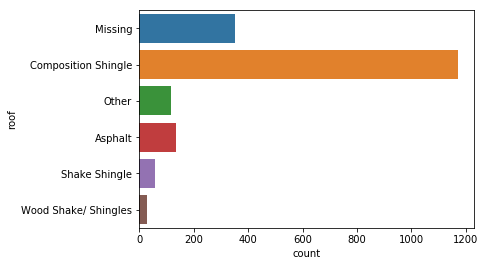

In [107]:
# Bar plot for roof
sns.countplot(y='roof', data=df)

Much nicer!

# 4. Encode dummy variables (categorical)

**Dummy variables are a set of binary (0 or 1) features that each represent a single class from a categorical feature.**

Scikit-Learn package machine learning algorithms cannot handle categorical features directly. 
- Specifically, they cannot handle text values.
- we use 0 / 1 numeric representation, which allows us to pass Scikit-Learn's technical requirement.

Pandas has an incredibly easy function for doing this automatically.
* It's called pd.get_dummies().
* simply pass it a DataFrame and the list of columns of our categorical variables to make them into dummy variables

In [108]:
# Create new dataframe with dummy features
df = pd.get_dummies(df, columns=['exterior_walls','roof','property_type'])

Display the first 5 rows of your dataframe to see these new features.

In [109]:
# First 5 rows of dataframe
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,two_and_two,during_recession,property_age,school_score,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,roof_Wood Shake/ Shingles,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
0,295850,1,1,584,2013,0,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013,0,1,0,27.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
1,216500,1,1,612,1965,0,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006,0,0,41,9.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,279900,1,1,615,1963,0,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012,0,1,49,24.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
3,379900,1,1,618,2000,33541,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005,0,0,5,27.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,340000,1,1,634,1992,0,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002,0,0,10,27.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


# 5. Remove unused or redundant features

**Unused features**:

Unused features are those that don't make sense to pass into our machine learning algorithms.

Examples of unused features include:

- ID columns
- Features that wouldn't be available at the time of prediction (e.g. price of the property 5 years after transaction) 

**Redundant features:**
Redundant features would typically be those that have been replaced by other features that you've added.
For example, since we used 'tx_year' and 'year_built' to create the 'property_age' feature, we might consider removing them.

- Removing 'tx_year' could also be a good idea because we don't want our model being overfit to the transaction year.
- Since we'll be applying this model to future transactions, we might want the algorithms to focus on learning patterns from the other features 

Sometimes it's not quite black and white. There might be no clear right or wrong decision for this step, and that's OK.


Drop <code style="color:steelblue">'tx_year'</code> and <code style="color:steelblue">'year_built'</code> columns from your dataset.

In [110]:
# Drop 'tx_year' and 'year_built' from the dataset
df = df.drop(['tx_year', 'year_built'], axis=1)

Save the analytical base table.

In [112]:
# Save analytical base table
df.to_csv('analytical_base', index=None)

Not all of the features we engineer need to be winners. 
* In fact, often times many of them do not add much value to your model. 
* That's OK. Remember: One highly predictive feature makes up for 10 duds.

The key is choosing machine learning algorithms that can effectively select the best features among many options (**built-in feature selection**). This will allow us to avoid overfitting your model despite providing many input features. Super cool!

And that's the feature engineering step!

The essenitla things to do in feature engineering step:
* Make several indicator features from domain knowledge.
* Create interaction features i.e. <code style="color:steelblue">'property_age'</code>.
* Group sparse classes like we did with <code style="color:steelblue">'exterior_walls'</code> and <code style="color:steelblue">'roof'</code> features.
* Encoded dummy variables for our categorical variables
* Save the final analytical base table.

## Next Step

In the next step, <span style="color:royalblue">Step 4: Regression Algorithms</span>, we go into experimenting to find the best (and effective) machine learning algorithms for our model.
